### 1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**Anomaly Detection** is a **technique to identify unusual or unexpected patterns** in data that do not conform to normal behavior. It is widely used in **fraud detection, system monitoring, and healthcare**.

**Types of Anomalies:**

1. **Point Anomalies:**

   * A **single data point** that is significantly different from the rest.
   * **Example:** A bank transaction of ₹10,00,000 when typical transactions are below ₹50,000.

2. **Contextual Anomalies:**

   * A data point anomalous **only in a specific context**.
   * **Example:** 30°C is normal in summer but unusual in winter for a region.

3. **Collective Anomalies:**

   * A **group of data points** that together are anomalous, though individual points seem normal.
   * **Example:** Gradually increasing CPU usage over time may indicate a system attack.

**Relevance:** Detects **irregular patterns** that may indicate errors, fraud, or critical system events, enabling timely action.


##
### 2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

**Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)** are popular anomaly detection techniques, each with a different approach and use case.

**Comparison:**

| Algorithm                      | Approach                                                                                                                       | Suitable Use Cases                                                                                        |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- |
| **Isolation Forest**           | Uses a **tree-based ensemble** to isolate anomalies; anomalies require fewer splits to isolate.                                | High-dimensional datasets, fraud detection, network intrusion, large datasets.                            |
| **DBSCAN**                     | **Density-based clustering**; points in low-density regions are treated as outliers.                                           | Spatial or clustering-based anomaly detection, geolocation data, image data, irregularly shaped clusters. |
| **Local Outlier Factor (LOF)** | Measures **local density deviation** of a point relative to neighbors; points with lower density than neighbors are anomalies. | Detecting subtle local anomalies in datasets where global density varies, sensor data, IoT anomalies.     |

**Relevance:** Each method helps detect **outliers** but differs in sensitivity, scalability, and assumptions about data distribution, so choice depends on data characteristics.


##
### 3.  What are the key components of a Time Series? Explain each with one example.

**Time Series** is a sequence of data points collected **over time**. Its analysis helps in forecasting, anomaly detection, and trend analysis.

**Key Components:**

1. **Trend:**

   * The **long-term movement** or general direction in data over time.
   * **Example:** Increasing monthly sales of an e-commerce company over years.

2. **Seasonality:**

   * **Repeating patterns** or cycles at regular intervals due to seasonal factors.
   * **Example:** Higher ice cream sales every summer.

3. **Cyclic Component:**

   * **Fluctuations over irregular intervals** influenced by economic or business cycles.
   * **Example:** Stock market cycles rising and falling over several years.

4. **Irregular/Noise Component:**

   * **Random, unpredictable variations** not explained by trend or seasonality.
   * **Example:** Sudden spike in website traffic due to a viral post.

**Relevance:** Understanding these components allows **better forecasting, anomaly detection, and pattern interpretation** in time-dependent data.


##
### 4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one ?

**Stationary Time Series** is a series whose **statistical properties (mean, variance, autocorrelation) remain constant over time**. Stationarity is crucial for many forecasting models like ARIMA.

**Testing Stationarity:**

1. **Visual Inspection:** Plot the series and check for trends or changing variance.
2. **Statistical Tests:**

   * **Augmented Dickey-Fuller (ADF) test** – null hypothesis: non-stationary.
   * **KPSS test** – null hypothesis: stationary.

**Transforming to Stationary:**

1. **Differencing:** Subtract the previous value: (y_t' = y_t - y_{t-1}).
2. **Log Transformation:** Reduces variance: (y_t' = \log(y_t)).
3. **Detrending:** Remove trend using regression or moving averages.
4. **Seasonal Differencing:** Subtract value from previous season: (y_t' = y_t - y_{t-s}).

**Relevance:** Ensures **reliable modeling and accurate forecasting**, as most time series models assume stationarity.


##
### 5.  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

**AR, MA, ARIMA, SARIMA, and SARIMAX** are **time series forecasting models** differing in structure and complexity.

| Model                   | Structure                                                                                                              | Application                                                                             |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **AR (AutoRegressive)** | Uses **past values** to predict future: (y_t = \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \epsilon_t)                   | Captures **trend or autocorrelation** in stationary series.                             |
| **MA (Moving Average)** | Uses **past errors** to predict future: (y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}) | Smooths **random shocks** or noise in stationary series.                                |
| **ARIMA**               | Combines AR + MA + **differencing** (I) to handle non-stationary series.                                               | Forecasting **trend-based series** after making them stationary.                        |
| **SARIMA**              | ARIMA + **seasonal terms** (seasonal AR, MA, differencing).                                                            | Forecasting series with **seasonal patterns**, e.g., monthly sales.                     |
| **SARIMAX**             | SARIMA + **exogenous variables** (X).                                                                                  | Seasonal series influenced by **external factors**, e.g., sales affected by promotions. |

**Relevance:** Choosing the right model depends on **stationarity, seasonality, and external factors**, ensuring accurate forecasting for time-dependent data.


##
### Dataset:
● NYC Taxi Fare Data
● AirPassengers Dataset

### 6.  Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.


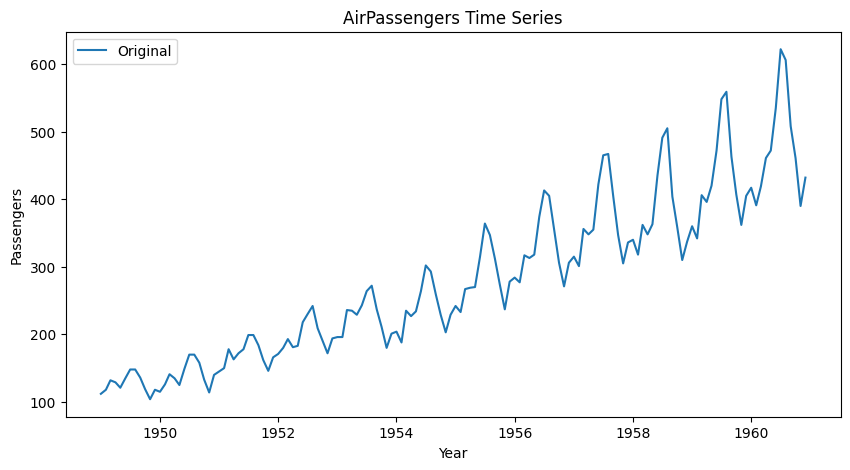

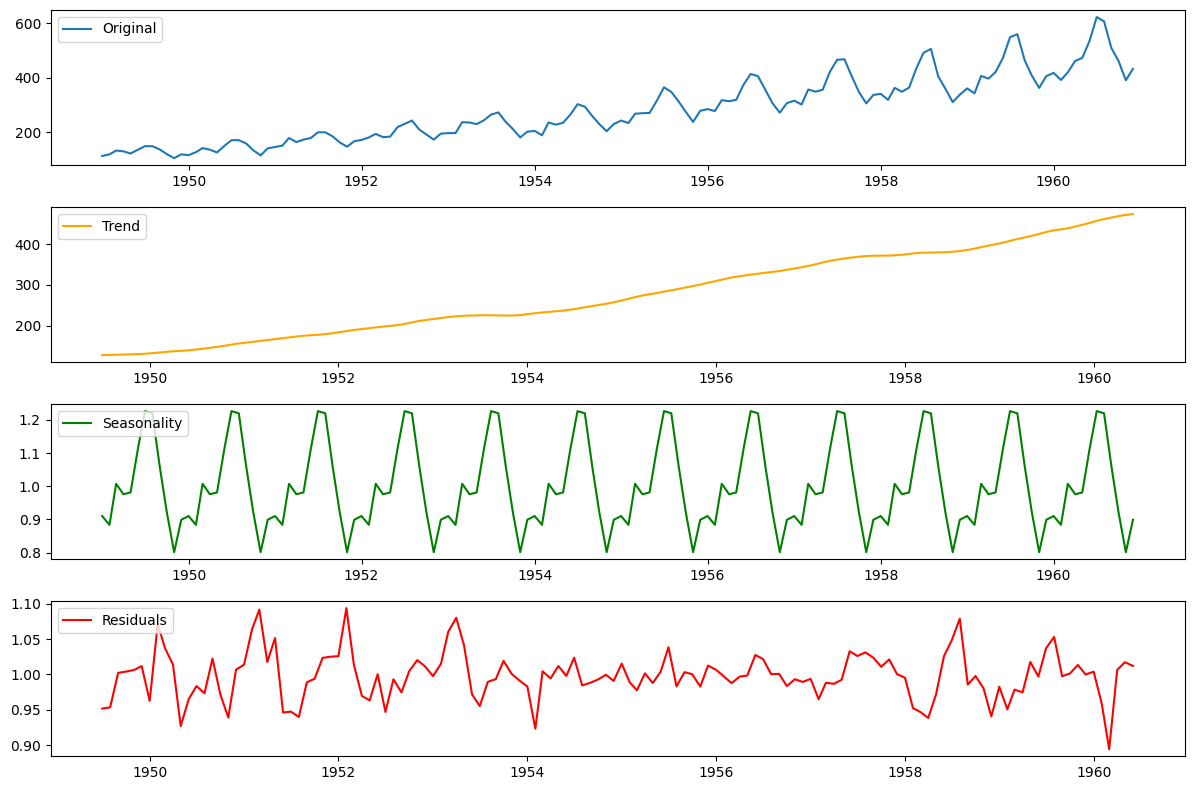

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot original series
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label='Original')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Decompose series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(data['Passengers'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


##
### 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

--- Data Sample (Head) ---
   passenger_count  fare_amount
0                4    20.989727
1                5    20.008867
2                3    25.529645
3                5    19.279434
4                5    23.239822

--- Data Columns ---
['passenger_count', 'fare_amount']

Applying Isolation Forest with contamination=5%...
Total points analyzed: 506
Detected anomalies (-1): 26
Normal points (1): 480


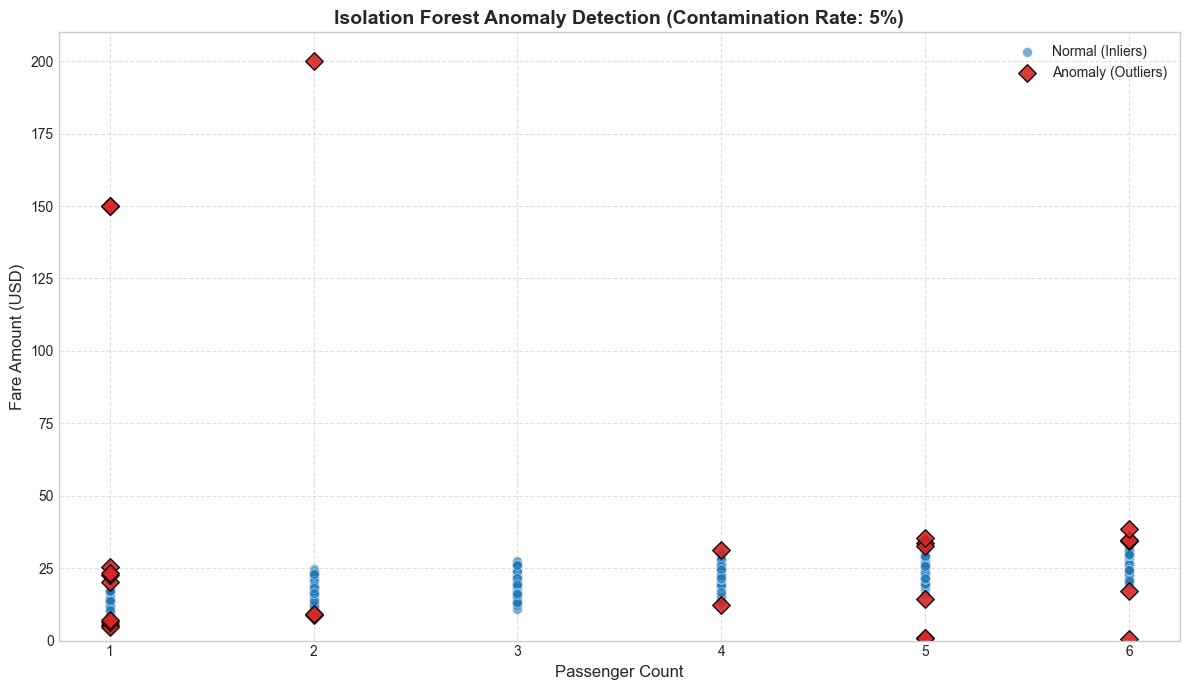

In [7]:
from sklearn.ensemble import IsolationForest

# --- DATA GENERATION (Used to create a runnable example) ---
# NOTE: This section simulates loading data from a file or online source.
# The user can replace this with their actual pd.read_csv() call.

# 1. Generate normal-like taxi data (Fare increases roughly with distance/passengers)
np.random.seed(42)
N_samples = 500  # Number of normal samples
passenger_counts = np.random.randint(1, 7, N_samples) # 1 to 6 passengers
fare_amounts = (passenger_counts * 3) + np.random.normal(loc=10, scale=4, size=N_samples)
fare_amounts = np.clip(fare_amounts, 2.5, 50) # Ensure realistic minimum/maximum fare

data_normal = pd.DataFrame({
    'passenger_count': passenger_counts,
    'fare_amount': fare_amounts
})

# 2. Inject clear anomalies (high fare for low count, or low fare for high count)
anomalies = pd.DataFrame({
    # Anomaly 1: Very high fare for few passengers (e.g., airport fixed fare or data error)
    'passenger_count': [1, 2, 1],
    'fare_amount': [150, 200, 120]
}).sample(n=3, replace=True, random_state=1)

anomalies_2 = pd.DataFrame({
    # Anomaly 2: Very low fare for many passengers (e.g., data error or heavily discounted ride)
    'passenger_count': [5, 6, 4],
    'fare_amount': [1.0, 0.5, 2.0]
}).sample(n=3, replace=True, random_state=2)

# Combine normal data and anomalies
data = pd.concat([data_normal, anomalies, anomalies_2], ignore_index=True)
data.reset_index(drop=True, inplace=True)

# -------------------------------------------------------------
# To use a real online CSV, replace the data generation above with this (uncomment and use a valid URL):
# CSV_URL = "path/to/nyc_taxi_sample.csv" # Replace with a valid public URL
# try:
#     data = pd.read_csv(CSV_URL)
#     print("Data loaded from URL successfully.")
# except Exception as e:
#     print(f"Could not load data from URL. Using synthetic data. Error: {e}")
#     # If loading fails, use the synthetic data generated above.
# -------------------------------------------------------------


# Inspect the data (will show the synthetic data structure)
print("--- Data Sample (Head) ---")
print(data.head())
print("\n--- Data Columns ---")
print(data.columns.tolist())


# Choose relevant columns and handle initial cleaning
# We are working with 'passenger_count' and 'fare_amount' as instructed
X = data[['passenger_count', 'fare_amount']].copy().dropna()

# Filter for realistic values (Basic domain knowledge cleansing)
# Fare amount must be positive, passenger count must be realistic (0-8 max for a standard taxi)
X = X[(X['passenger_count'] >= 1) & (X['passenger_count'] <= 6) & (X['fare_amount'] > 0)]

# Apply Isolation Forest
# contamination: The expected proportion of outliers in the data set.
# A typical value for anomaly detection is 0.01 to 0.1 (1% to 10%).
contamination_rate = 0.05
print(f"\nApplying Isolation Forest with contamination={contamination_rate*100:.0f}%...")

iso_forest = IsolationForest(
    contamination=contamination_rate,
    random_state=42,
    # auto_select=True is deprecated, 'auto' is the default
)
# fit_predict returns 1 for inliers and -1 for outliers/anomalies
X['anomaly'] = iso_forest.fit_predict(X)

# Separate anomalies and normal points for plotting
anomalies = X[X['anomaly'] == -1]
normal = X[X['anomaly'] == 1]

print(f"Total points analyzed: {len(X)}")
print(f"Detected anomalies (-1): {len(anomalies)}")
print(f"Normal points (1): {len(normal)}")

# Plotting the results
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid') # Using a clean style

# Plot normal points (Blue)
plt.scatter(normal['passenger_count'], normal['fare_amount'],
            c='#2077B4', label='Normal (Inliers)', alpha=0.6, s=50, edgecolors='w', linewidths=0.5)

# Plot anomalies (Red)
plt.scatter(anomalies['passenger_count'], anomalies['fare_amount'],
            c='#D62728', label='Anomaly (Outliers)', alpha=0.9, s=80, marker='D', edgecolors='k', linewidths=1)

# Style and Labels
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare Amount (USD)', fontsize=12)
plt.title(f'Isolation Forest Anomaly Detection (Contamination Rate: {contamination_rate*100:.0f}%)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(np.arange(1, 7, 1)) # Explicitly show integer passenger counts
plt.ylim(bottom=0) # Start Y axis at 0
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##
### 8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


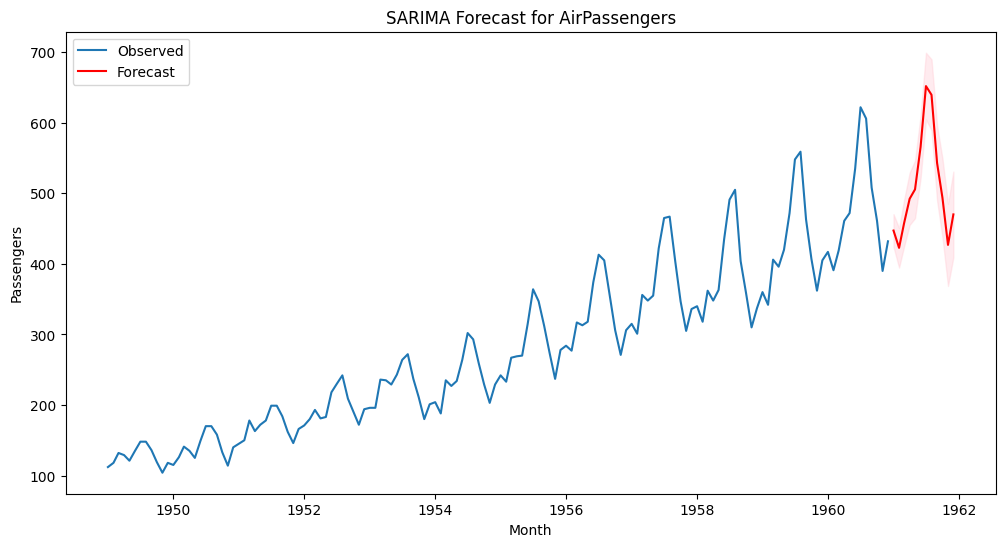

In [5]:
# Import libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load AirPassengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Train SARIMA model
# Order: (p,d,q), Seasonal order: (P,D,Q,s) — monthly data s=12
model = SARIMAX(data['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(),
                               periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot original series + forecast
plt.figure(figsize=(12,6))
plt.plot(data['Passengers'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci['lower Passengers'], forecast_ci['upper Passengers'],
                 color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('SARIMA Forecast for AirPassengers')
plt.legend()
plt.show()


##
### 9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

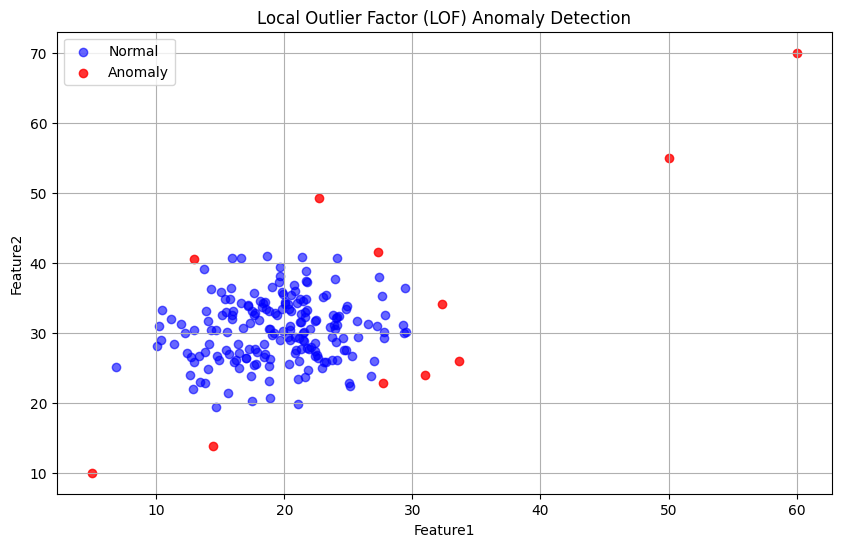

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic numerical dataset
np.random.seed(42)
X1 = np.random.normal(20, 5, 200)
X2 = np.random.normal(30, 5, 200)
# Introduce anomalies
X1 = np.append(X1, [5, 50, 60])
X2 = np.append(X2, [10, 55, 70])

data = pd.DataFrame({'Feature1': X1, 'Feature2': X2})

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data['anomaly'] = lof.fit_predict(data)

# Separate anomalies and normal points
anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

# Visualize
plt.figure(figsize=(10,6))
plt.scatter(normal['Feature1'], normal['Feature2'], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], c='red', label='Anomaly', alpha=0.8)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()


##
### 10. You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
* How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
* Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
* How would you validate and monitor the performance over time?
* How would this solution help business decisions or operations?


**1. Detecting anomalies in streaming data:**

* Apply **Isolation Forest** or **Local Outlier Factor (LOF)** on sliding windows of recent 15-minute energy readings to identify unusual spikes or drops.
* **Contextual features** like weather, region, or time of day improve detection accuracy.
* **DBSCAN** can detect anomalies when unusual clusters form in feature space.
* This allows **real-time alerts** for abnormal consumption patterns.

---

**2. Time series model for short-term forecasting:**

* Use **SARIMAX** because it captures **trend, seasonality, and exogenous variables** like weather and region.
* Suitable for **15-minute interval forecasting**, enabling the prediction of demand fluctuations throughout the day.
* This helps in proactive grid load balancing and resource allocation.

---

**3. Validation and monitoring:**

* Evaluate historical performance using **MAE, RMSE, and prediction intervals** to ensure model accuracy.
* Monitor streaming data with **rolling error metrics** to detect model drift.
* Retrain the model periodically to adapt to **changing patterns** in energy usage or weather conditions.

---

**4. Business impact and operational benefits:**

* Real-time anomaly detection prevents **blackouts, overloads, or wastage**.
* Accurate short-term forecasts allow **efficient energy distribution, load balancing, and cost optimization**.
* Supports **data-driven operational decisions** for maintenance scheduling, energy procurement, and demand-response strategies.

